<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt, cos, sin, pi

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов и датасета.

In [5]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [6]:
print(np.dot(x1,x2))

234704.86490859918


Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [9]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


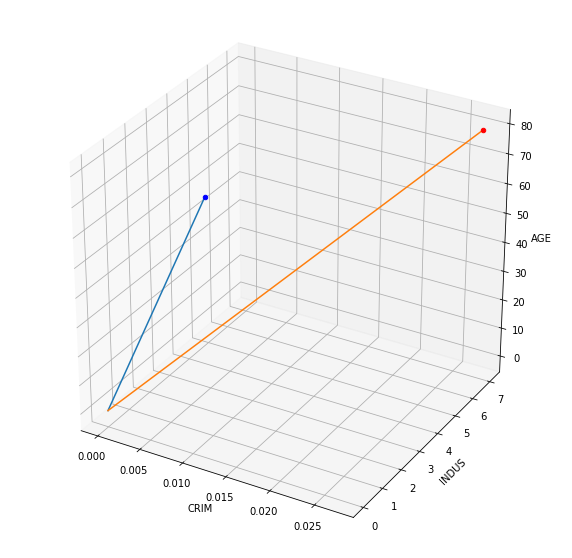

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(boston_df['CRIM'])
y = np.array(boston_df['INDUS'])
z = np.array(boston_df['AGE'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')

ax.set_xlabel('CRIM')
ax.set_ylabel('INDUS')
ax.set_zlabel('AGE')

plt.show()

Найти косинус угла между векторами x1 и x2

In [16]:
np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

0.994296998616362

Найти расстояние между точками x1 и x2.

In [17]:
np.linalg.norm(x1 - x2)

58.955079696240766

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

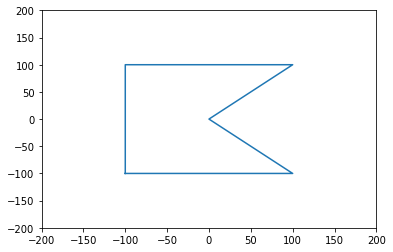

In [18]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-500, 500)

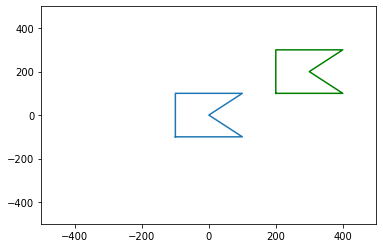

In [33]:
B = A + [300,200,0]
x = A[:,0]
y = A[:,1]
a = B[:,0]
b = B[:,1]

plt.plot(x, y)
plt.plot(a,b, color = "g")
plt.ylim([-500, 500])
plt.xlim([-500, 500])

Уменьшить объект в два раза.

[[-50 -50   1]
 [-50  50   1]
 [ 50  50   1]
 [  0   0   1]
 [ 50 -50   1]
 [-50 -50   1]]


(-200, 200)

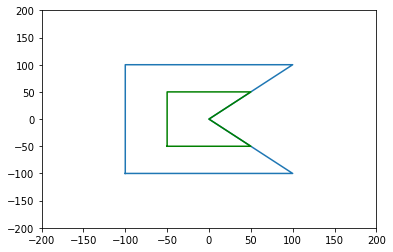

In [36]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)


x = A[:,0]
y = A[:,1]
a = B[:,0]
b = B[:,1]

plt.plot(x, y)
plt.plot(a,b, color = "g")
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Повернуть на 130 градусов.

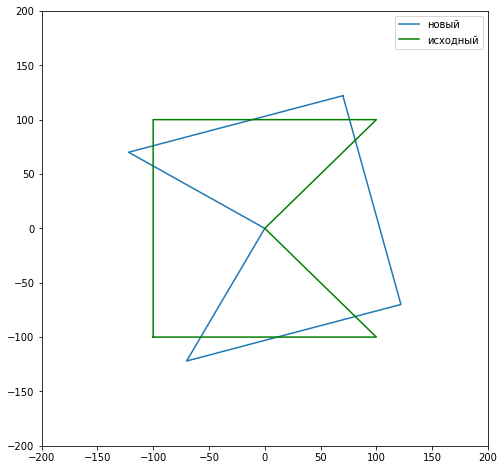

In [44]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)

plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])


Отразить объект относительно прямой y=x

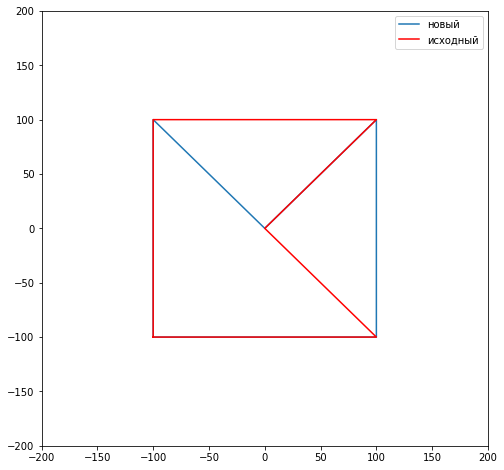

In [48]:
TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

B = []
for point in A:
    new_point = np.dot(TransformArray,point)
    B.append(new_point)
B = np.array(B).astype(int)



plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])